In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
import cartopy.feature as cfeature
from scipy.interpolate import griddata



In [2]:
lat = np.load('./sliced/lat_array.npy')
lon = np.load('./sliced/lon_array.npy')
time = np.load('./sliced/time_array.npy')
output_wind = np.load('./inference_outputs.npy')


In [ ]:
output_wind_corrected = output_wind[:,0]

# Apply the condition to create a binary classification
output_wind_binary = np.where(output_wind_corrected < 3, 1, 0)

In [19]:
output_wind[:,0]
np.shape(output_wind)

(32000, 1)

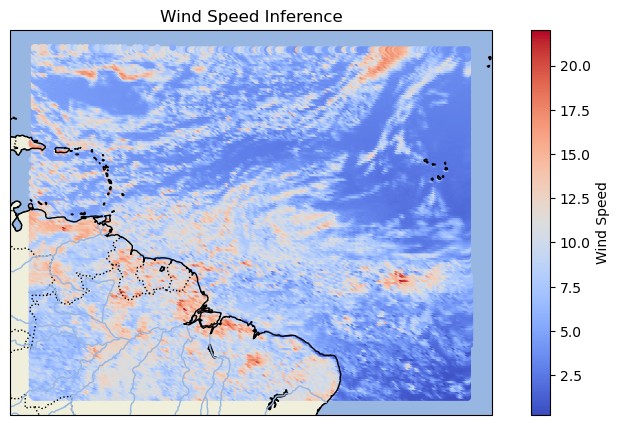

In [45]:

# Create a figure and set up a map projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Plot the data
sc = ax.scatter(lon, lat, c=output_wind[:, 0], cmap='coolwarm', s=15, transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(sc, ax=ax, orientation='vertical', label='Wind Speed')

# Set the title
plt.title('Wind Speed Inference')

# Show the plot
plt.show()

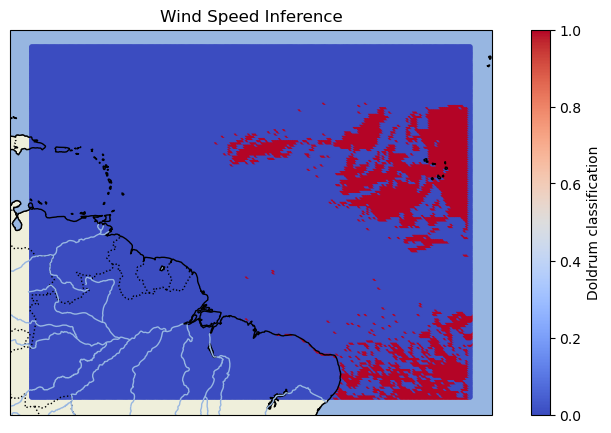

In [42]:

# Create a figure and set up a map projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Plot the data
sc = ax.scatter(lon, lat, c=output_wind_binary, cmap='coolwarm', s=10, transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(sc, ax=ax, orientation='vertical', label='Doldrum classification')

# Set the title
plt.title('Wind Speed Inference')

# Show the plot
plt.show()